In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time
import seaborn as sns
from IPython.display import display, clear_output
import itertools 
import pandas as pd
#New
from scipy.spatial import distance
import scipy.interpolate as interpolate
from scipy.integrate import quad
#Custom
import embeddings as emb
import utils
import knn

In [2]:
sd = 100 #np.random.randint(0,10e5)
#=Synthetic data
n_systems = 2
n_concepts = 200
noise = 0.001 #0.001
emb_dim = 3
n_epicentres = 2
linearsep = 2
A,B,X_A,X_B,B_shuff,B_idx_map = emb.get_data(n_systems,n_concepts,emb_dim,noise,n_epicentres,linearsep,sd,bplot=False)

In [3]:
k = 10
beta = 1
Ncorr =10

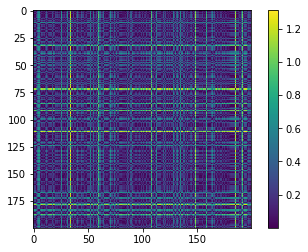

(200, 200)
(10, 3) (10, 3)
6 right over 10 tot
0.6
[[144 122 139]
 [ 54 150 148]
 [  1 160 160]
 [191  83  25]
 [ 95  21  21]
 [183 135 135]
 [ 10 152 152]
 [159 124 124]
 [102 175 175]
 [ 58 158  54]]
Took : 1.04 s


In [4]:
start = time.time()
D_XY = knn.get_DXY_curves(A,B_shuff,k,beta,bplot = True)
print(D_XY.shape)
X_pretrain,Y_pretrain, matches = knn.get_corres_data(A,B_shuff,D_XY,Ncorr)
print(X_pretrain.shape,Y_pretrain.shape)
acc , mat = knn.check_corresp(matches,B_idx_map)
print(acc)
print(mat)
end = time.time()
print("Took : %.2f s"%(end-start))

### Best Ncorr and k (beta fixed)

In [7]:
Ncorr_test = [1,3,5,10,13,15]
k_test = np.arange(5,16,1) #min k is 5 for some reason (linked with order of Bspline)
n_iter = 2
best_Ncorr_k, best_avg , all_accs_per_Ncorr_k  = knn.get_best_Ncorr_k_params_dist(n_iter,Ncorr_test,k_test,beta,
                        n_systems,n_concepts,emb_dim,noise,n_epicentres,linearsep,sd)
print("Best Ncorr / k : %s - Accuracy : %2f" %(best_Ncorr_k, best_avg))

'Iter 1 - Testing Ncorr : 15 - k : 15 ...'

Best Ncorr / k : (1, 6) - Accuracy : 1.000000


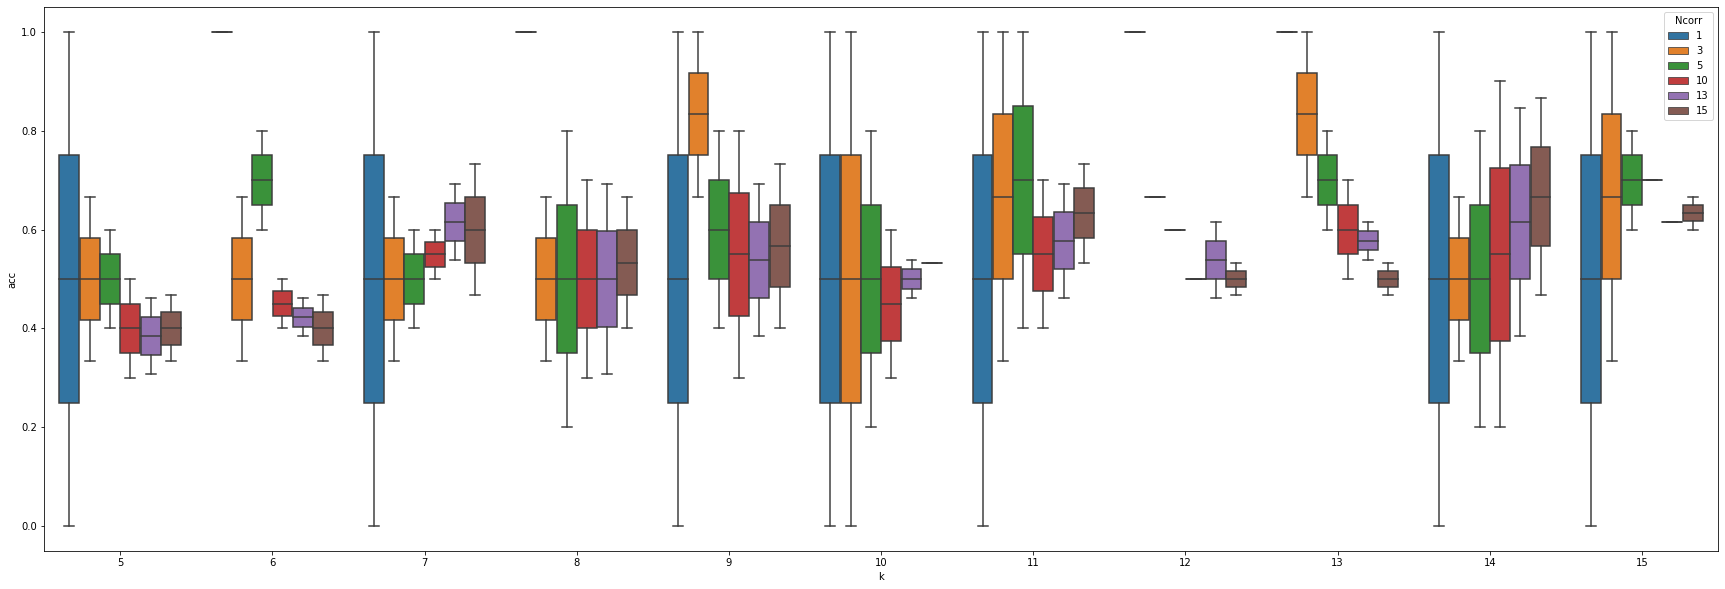

In [8]:
pairs = list(itertools.product(Ncorr_test,k_test))
df = knn.make_df_pair_params(pairs,all_accs_per_Ncorr_k,p1_name='Ncorr',p2_name='k')
fig, ax =  plt.subplots(figsize=(30,10))
sns.boxplot(x='k', y="acc", hue ='Ncorr', data=df , ax= ax)

### Best beta and k (Ncorr fixed)

In [ ]:
k_test = np.arange(5,16,1) #min k is 5 for some reason (linked with order of Bspline)
beta_test = [0.1,0.3,1,3]
n_iter = 2
best_beta_k, best_avg , all_accs_per_beta_k  = knn.get_best_beta_k_params_dist(n_iter,beta_test,k_test,Ncorr,
                        n_systems,n_concepts,emb_dim,noise,n_epicentres,linearsep,sd)
print("Best beta / k : %s - Accuracy : %2f" %(best_beta_k, best_avg))

In [ ]:
pairs = list(itertools.product(beta_test,k_test))
df = knn.make_df_pair_params(pairs,all_accs_per_beta_k,p1_name='beta',p2_name='k')
fig, ax =  plt.subplots(figsize=(30,10))
sns.boxplot(x='k', y="acc", hue ='beta', data=df , ax= ax)

### Best k only (beta and Ncorr fixed)

'Iter 9 - Testing k : 19 ...'

Best k : 15 - Accuracy : 0.710000


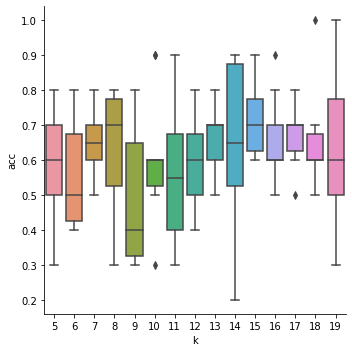

In [7]:
k_test = np.arange(5,20,1) #min k is 5 for some reason (linked with order of Bspline)
n_iter = 10
best_k_avg, best_avg , all_accs_per_k  = knn.get_best_k_params_dist(n_iter,k_test,beta,Ncorr,
                        n_systems,n_concepts,emb_dim,noise,n_epicentres,linearsep,sd)
print("Best k : %d - Accuracy : %2f" %(best_k_avg, best_avg))
df= utils.sns_cat_data_to_df(k_test,all_accs_per_k,cat_name='k',val_name = 'acc')
sns.catplot(x="k", y="acc", kind="box", data=df)

# Plots for reports

In [3]:
sd = 100 #np.random.randint(0,10e5)
#=Synthetic data
n_systems = 2
n_concepts = 200
noise = 0.001 #0.001
emb_dim = 3
n_epicentres = 2
linearsep = 2
A,B,X_A,X_B,B_shuff,B_idx_map = emb.get_data(n_systems,n_concepts,emb_dim,noise,n_epicentres,linearsep,sd,bplot=False)

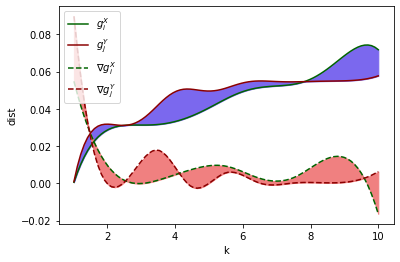

In [38]:
k = 10
beta = 1
Ncorr =10
X,Y = A,B_shuff
#Get splines X Y
D_X, I_X = knn.get_topk(X,k)#get_mat_knn_dist(X,k)#
splines_x = knn.fit_B_spline_mat(D_X)
D_Y, I_Y = knn.get_topk(Y,k)#get_mat_knn_dist(X,k)#
splines_y = knn.fit_B_spline_mat(D_Y)
# X_areas, X_grad_areas = knn.get_system_curve_areas(X,k,quick = True)
# Y_areas, Y_grad_areas = knn.get_system_curve_areas(Y,k,quick = True)
i,j = 4,67
spli = splines_x[i]
grad_spli = spli.derivative(nu=1)
splj = splines_y[j]
grad_splj = splj.derivative(nu=1)
dat = np.linspace(0,k,100)
plt.figure()
plt.plot(dat,spli(dat),label = r'$g_i^X$',color = 'darkgreen')
plt.plot(dat,splj(dat),label = r'$g_j^Y$',color = 'darkred')
plt.fill_between(dat, spli(dat), splj(dat),color = 'mediumslateblue')
plt.plot(dat,grad_spli(dat),label = r'$\nabla g_i^X$',color = 'darkgreen',linestyle = '--')
plt.plot(dat,grad_splj(dat),label = r'$\nabla  g_j^Y$',color = 'darkred',linestyle = '--')
plt.fill_between(dat, grad_spli(dat), grad_splj(dat),color = 'lightcoral')
plt.xlabel('k')
plt.ylabel('dist')
plt.legend()

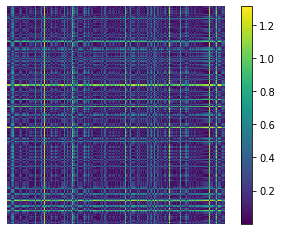

In [12]:
dist_curves = knn.get_DXY_curves(X,Y,k,beta,bplot = False,quick = True)
plt.figure()
plt.imshow(dist_curves)
plt.axis('off')
plt.colorbar()
plt.show()